In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
%matplotlib inline
import requests
import re

In [2]:
data =pd.read_csv('netflix_titles.csv')

In [3]:
data.columns

Index(['how_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   how_id        7787 non-null   int64 
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(2), object(10)
memory usage: 730.2+ KB


In [5]:
data.isna().sum()

how_id             0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
data.isna().sum()

how_id             0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
from scipy import stats

In [8]:
data.dropna(inplace=True)

In [9]:
data.head()

,how_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...


In [10]:
data.isna().sum()

how_id          0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [11]:
import matplotlib.pyplot as plt

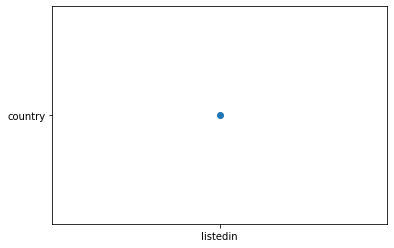

In [12]:
plt.scatter(x = 'listedin', y = 'country')

In [13]:
data.corr

<bound method DataFrame.corr of       how_id     type       title           director  \
1          2    Movie       07:19  Jorge Michel Grau   
2          3    Movie       23:59       Gilbert Chan   
3          4    Movie           9        Shane Acker   
4          5    Movie          21     Robert Luketic   
5          6  TV Show          46        Serdar Akar   
...      ...      ...         ...                ...   
7778    7779    Movie  Zombieland    Ruben Fleischer   
7780    7781    Movie         Zoo       Shlok Sharma   
7781    7782    Movie        Zoom       Peter Hewitt   
7782    7783    Movie        Zozo        Josef Fares   
7783    7784    Movie      Zubaan        Mozez Singh   

                                                   cast  \
1     Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2     Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3     Elijah Wood, John C. Reilly, Jennifer Connelly...   
4     Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   


In [14]:
data.columns.unique()

Index(['how_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

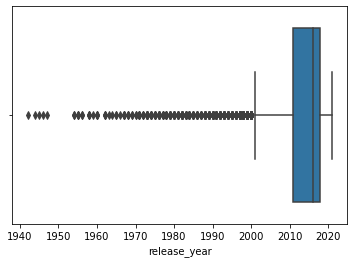

In [15]:
sns.boxplot(x= data['release_year'])

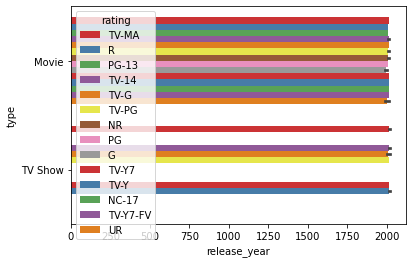

In [16]:
sns.barplot(data = data,x = 'release_year', y = 'type',hue = 'rating',palette = 'Set1')

In [18]:
df = pd.DataFrame(data)
df

,how_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
...,...,...,...,...,...,...,...,...,...,...,...,...
7778,7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
7780,7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...
7781,7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7782,7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...


In [19]:
type(df)

pandas.core.frame.DataFrame

In [20]:
df['type'] = df['type'].astype(bool)
df['date_added'] = df['date_added'].astype(bool)
df['title'] = df['title'].astype(bool)
df['duration'] = df['duration'].astype(bool)

In [21]:
df1 = pd.DataFrame (data, columns = ['type','release_year',])

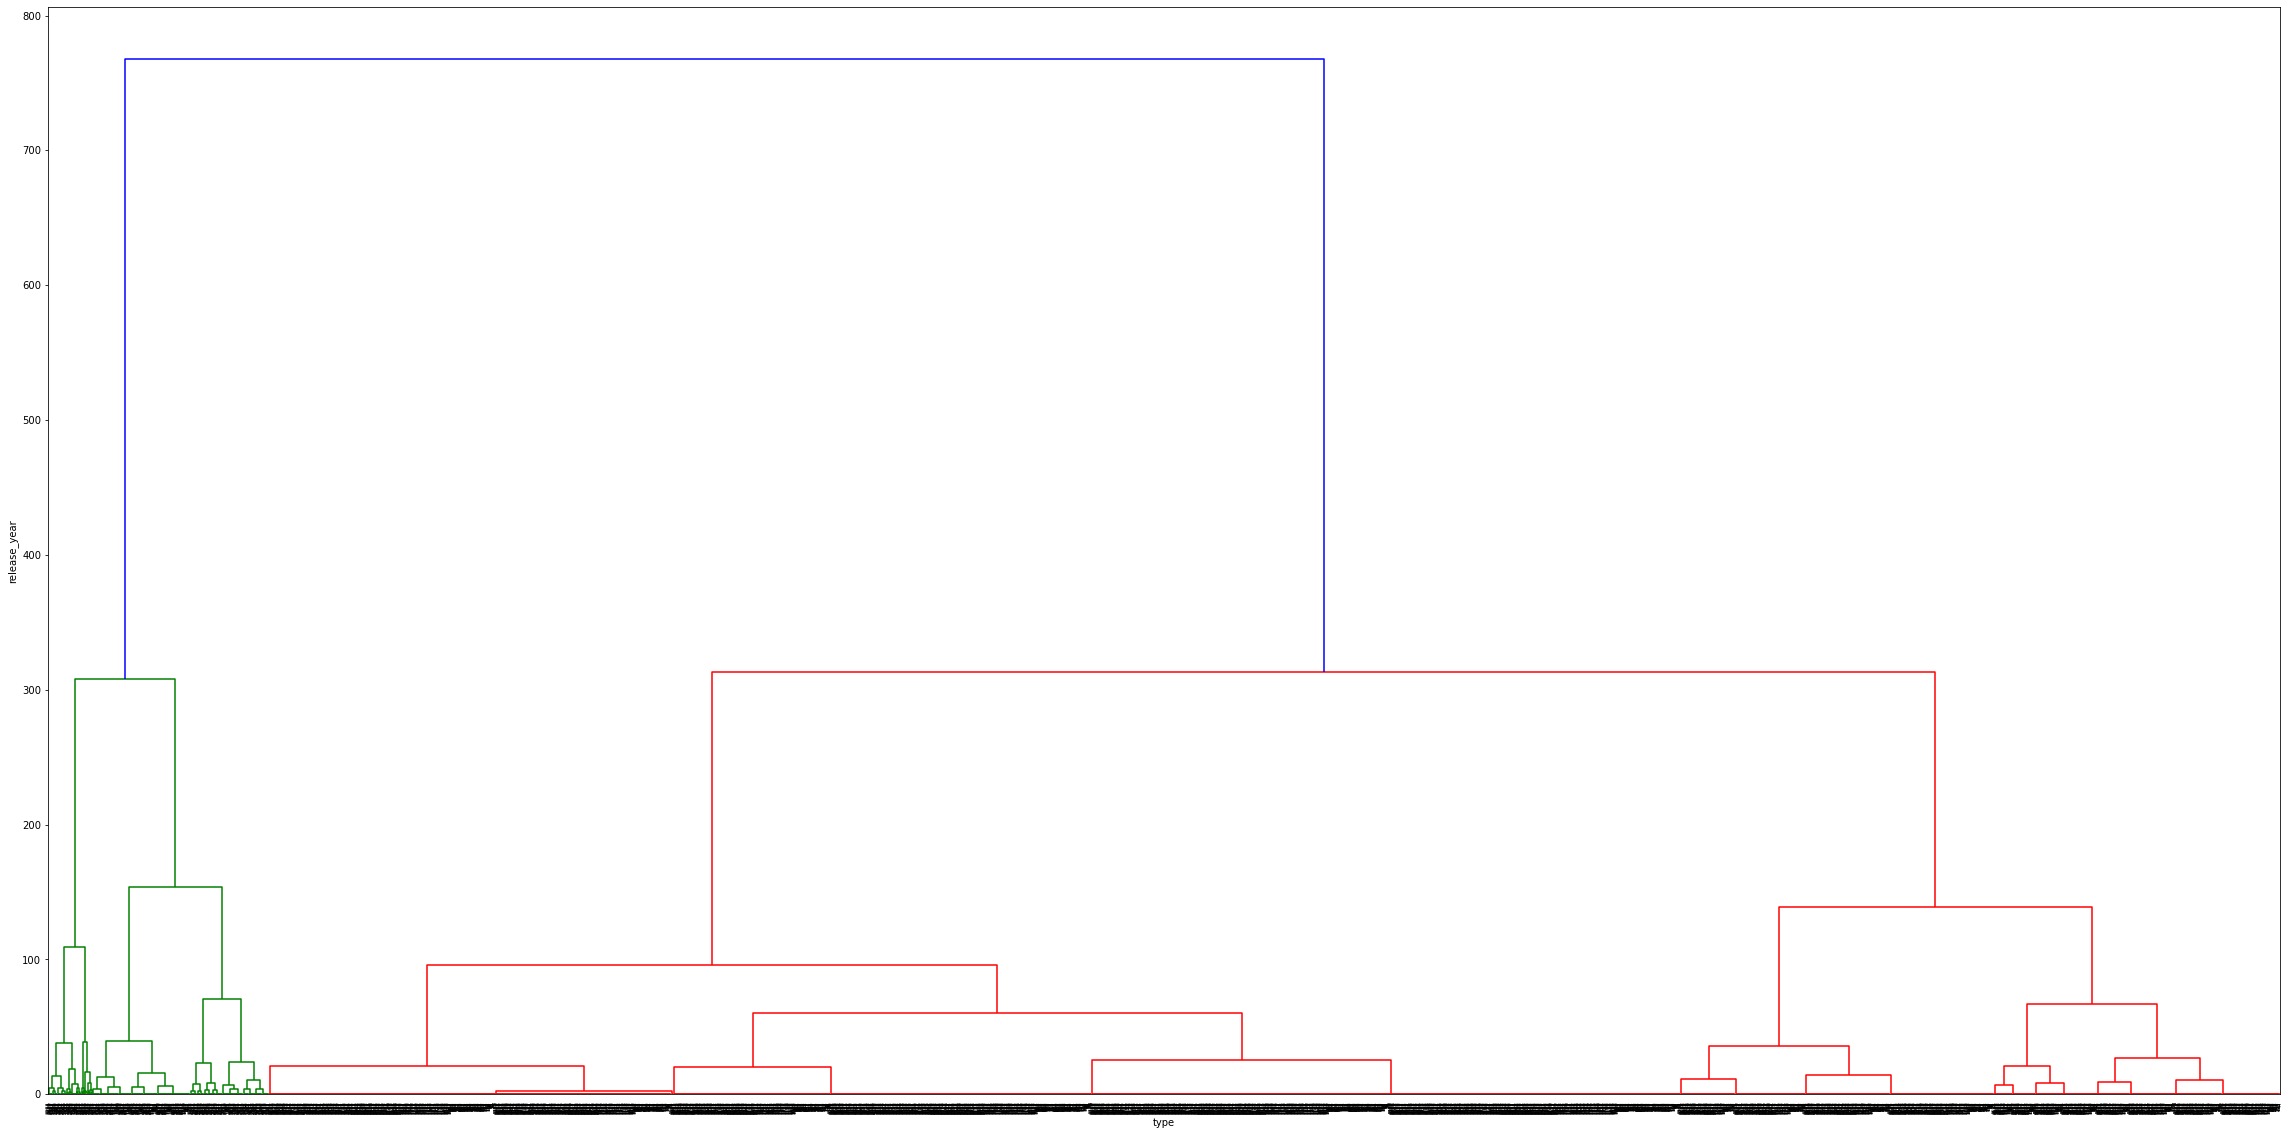

In [22]:
from scipy.cluster.hierarchy import dendrogram, ward
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20))
result = ward(df1)
dendrogram(result)
plt.xlabel("type")
plt.ylabel("release_year")
plt.show()

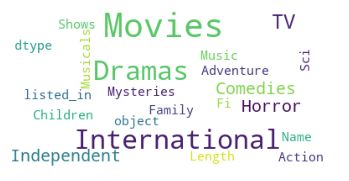

In [23]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(data['listed_in']))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

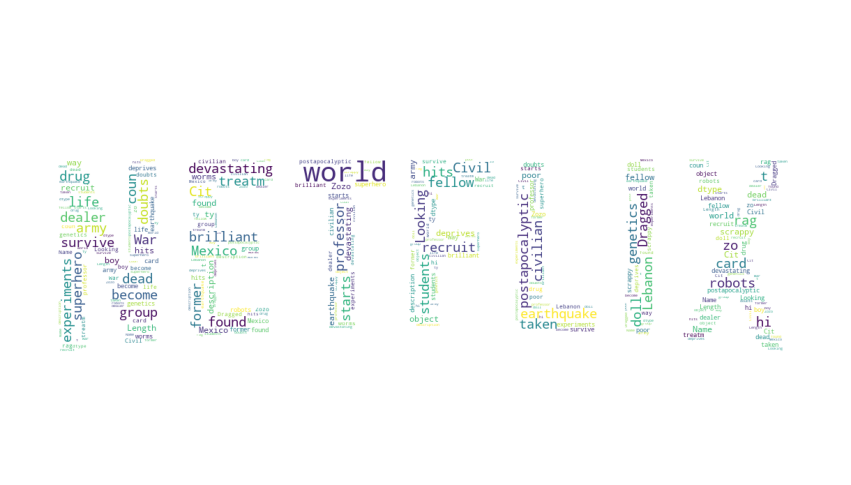

In [24]:
words = (str(data['description']))
mask = np.array(Image.open(requests.get('https://i.stack.imgur.com/B0AAW.png',stream=True).raw))


def create_wordcloud(words, mask):
    wc = WordCloud(width =500, height =800, background_color='white', 
                   stopwords=STOPWORDS, mask=mask,max_font_size =40,
                  repeat=True,max_words = 300).generate(words)

    plt.figure(figsize=(15,15))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()
    

create_wordcloud(words, mask)